# Estatísticas da CCD

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils_ccd import get_connection

conn_bddip = get_connection(db="BdDIP")
conn = get_connection()

## Processos no Setor

In [2]:
sql_processos_setor = ''' SELECT DISTINCT CONCAT(pro.numero_processo, '/', pro.ano_processo) as processo,
       pro.IdProcesso as id,
       pro.assunto,
       pm.Descricao as marcador

FROM processo.dbo.Processos pro
LEFT JOIN processo.dbo.Pro_MarcadorProcesso pmp ON pmp.IdProcesso = pro.IdProcesso
LEFT JOIN processo.dbo.Pro_Marcador pm ON pmp.IdMarcador = pm.IdMarcador
WHERE pro.setor_atual = 'CCD'

'''
processos_ccd = pd.read_sql(sql_processos_setor, get_connection())

In [3]:
processos_ccd.head()

,processo,id,assunto,marcador
0,000068/2022,558734,"APURAÇÃO DE RESPONSABILIDADE, REFERENTE AO PRO...",CADASTRAR DÉBITO
1,000128/2022,562009,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,DESCONTO EM FOLHA - Implementar Nereu
2,000133/2022,562035,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,DESCONTO EM FOLHA - Implementar Nereu
3,000136/2022,562041,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,GCADE - SUSPENSÃO NEREU
4,000139/2022,561983,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,GCADE - SUSPENSÃO NEREU


In [4]:
len(processos_ccd), len(processos_ccd['id'].unique())

(1579, 1579)

In [5]:
df_marcador = processos_ccd.groupby('marcador').id.nunique().sort_values(ascending=False).reset_index()

In [6]:
df_marcador

,marcador,id
0,GCADE - SUSPENSÃO NEREU,137
1,PARCELAMENTO EM CURSO,116
2,GCPRO - SUSPENSÃO NEREU,83
3,DESCONTO EM FOLHA - Implementar Nereu,62
4,Nereu - SOBRESTADO,35
5,GCGIL - SUSPENSÃO NEREU,23
6,CÁLCULO VENCIMENTOS DO GESTOR,23
7,CADASTRAR DÉBITO,22
8,DESCONTO EM FOLHA - ACOMPANHAMENTO,22
9,DESCONTO EM FOLHA - Implementar,21


C:\Users\05911205424\AppData\Local\Temp\ipykernel_13456\3000742377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='id', y='marcador', data=df_marcador, palette='viridis')


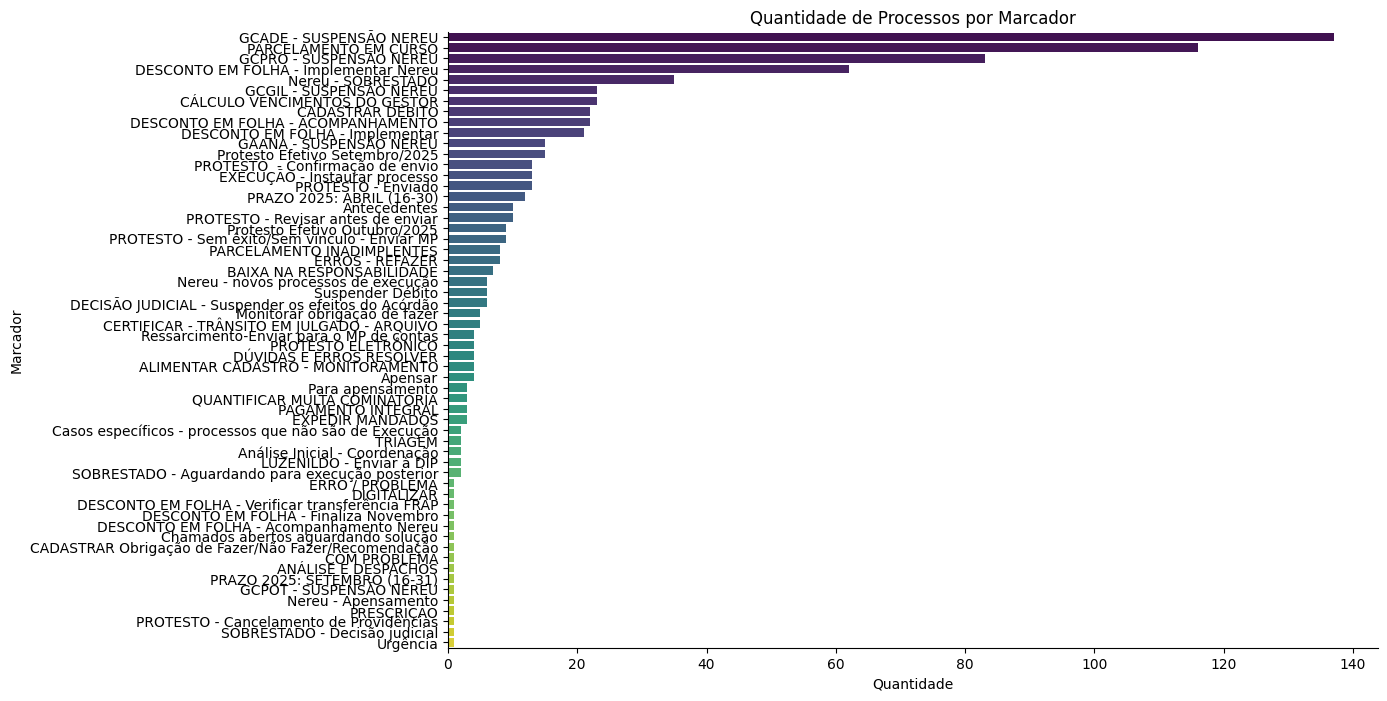

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(x='id', y='marcador', data=df_marcador, palette='viridis')
plt.title('Quantidade de Processos por Marcador')
plt.xlabel('Quantidade')
plt.ylabel('Marcador')
sns.despine(top=True, right=True)
plt.show()

In [9]:
df_marcador['categoria'] = 'outros'
df_marcador['marcador'] = df_marcador['marcador'].str.lower()
df_marcador.loc[df_marcador.marcador.str.contains('desconto'), 'categoria'] = 'desconto'
df_marcador.loc[df_marcador.marcador.str.contains('nereu'), 'categoria'] = 'nereu'
df_marcador.loc[df_marcador.marcador.str.contains('sobrestado'), 'categoria'] = 'sobrestado'
df_marcador.loc[df_marcador.marcador.str.contains('protesto'), 'categoria'] = 'protesto'
df_marcador.loc[df_marcador.marcador.str.contains('julgado'), 'categoria'] = 'transito em julgado'
df_marcador.loc[df_marcador.marcador.str.contains('erros'), 'categoria'] = 'erros'
df_marcador.loc[df_marcador.marcador.str.contains('vencimentos'), 'categoria'] = 'cálculo vencimentos'
df_marcador.loc[df_marcador.marcador.str.contains('monitoramento'), 'categoria'] = 'monitoramento'
df_marcador.loc[df_marcador.marcador.str.contains('execução'), 'categoria'] = 'execução'

C:\Users\05911205424\AppData\Local\Temp\ipykernel_17684\2575102010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_marcador.groupby('categoria')['id'].sum().sort_values(ascending=False).index,


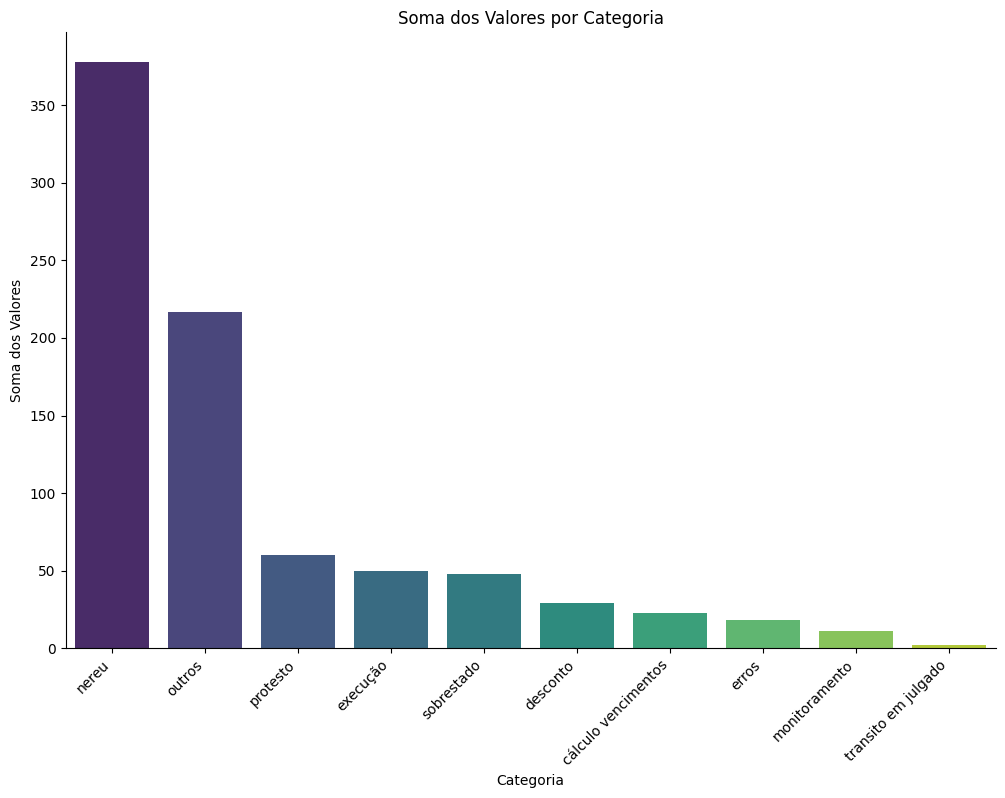

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_marcador.groupby('categoria')['id'].sum().sort_values(ascending=False).index,
            y=df_marcador.groupby('categoria')['id'].sum().sort_values(ascending=False).values,
            palette='viridis')
plt.title('Soma dos Valores por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Soma dos Valores')
plt.xticks(rotation=45, ha='right')
sns.despine(top=True, right=True)
plt.show()

## Decisões

In [10]:
sql_decisoes = """
SELECT *
FROM vwDecisao
"""

In [ ]:
df_decisoes = pd.read_sql(sql_decisoes, conn)

In [ ]:
len(df_decisoes)

109431

In [ ]:
df_decisoes.head()

,IdInformacao,numero_processo,ano_processo,codigo_tipo_processo,assunto,setor,resumo,data_resumo,arquivo,datapublicacao
0,183468,000739,2006,INE,INEXIGIBILIDADE DE LICITAÇÃO (EM ATENDIMENTO À...,secsc,EMENTA: INEXIGIBILIDADE DE LICITAÇÃO E PAGAMEN...,2010-07-14 09:04:53.827,secsc/secsc_000739_2006_0005.pdf,NaT
1,235433,011136,2003,CTR,CONTRATO Nº003/AGN 2003(EM ATENDIMENTO A DILIG...,secsc,EMENTA: APURAÇÃO DE RESPONSABILIDADE POR ATRAS...,2011-10-11 11:32:39.200,secsc/secsc_011136_2003_0011.pdf,NaT
2,235434,011136,2003,CTR,CONTRATO Nº003/AGN 2003(EM ATENDIMENTO A DILIG...,secsc,EMENTA: APURAÇÃO DE RESPONSABILIDADE POR ATRAS...,2011-10-11 11:32:54.297,secsc/secsc_011136_2003_0012.pdf,NaT
3,235443,011136,2003,CTR,CONTRATO Nº003/AGN 2003(EM ATENDIMENTO A DILIG...,secsc,EMENTA: APURAÇÃO DE RESPONSABILIDADE POR ATRAS...,2011-10-11 11:39:03.977,secsc/secsc_011136_2003_0013.pdf,NaT
4,235460,011136,2003,CTR,CONTRATO Nº003/AGN 2003(EM ATENDIMENTO A DILIG...,secsc,EMENTA: APURAÇÃO DE RESPONSABILIDADE POR ATRAS...,2011-10-11 11:56:10.370,secsc/secsc_011136_2003_0014.pdf,NaT


In [ ]:
df_decisoes['ano'] = df_decisoes.data_resumo.dt.year
df_decisoes['mes'] = df_decisoes.data_resumo.dt.month
df_decisoes['ano_mes'] = df_decisoes.data_resumo.dt.to_period('M')

In [ ]:
len(df_decisoes)

109431

In [ ]:
df_decisoes.groupby(['ano_mes']).count().reset_index()['IdInformacao'].mean()

np.float64(441.2540322580645)

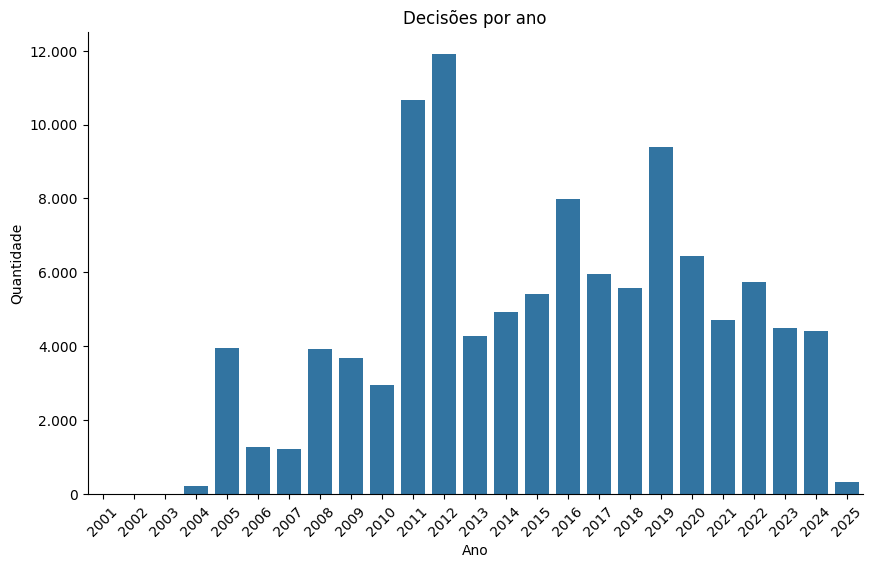

In [ ]:
import locale

plt.figure(figsize=(10, 6))
sns.barplot(x=df_decisoes['ano'].value_counts().index, y=df_decisoes['ano'].value_counts().values)
plt.title('Decisões por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
sns.despine()
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", x, grouping=True)))
plt.show()

## Obrigações

In [ ]:
sql_obrigacoes = """
SELECT *
FROM Obg_Obrigacao
"""

df_obg = pd.read_sql(sql_obrigacoes, conn_processo)

sql_obrigacoes_retiradas = """
SELECT *
FROM Obg_ObrigacaoRetirada
"""

df_obg_ret = pd.read_sql(sql_obrigacoes_retiradas, conn_processo)

/tmp/ipykernel_183691/3852579996.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_obg = pd.read_sql(sql_obrigacoes, conn_processo)
/tmp/ipykernel_183691/3852579996.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_obg_ret = pd.read_sql(sql_obrigacoes_retiradas, conn_processo)


In [ ]:
len(df_obg), len(df_obg_ret)

(948, 504)

In [ ]:
df_obg['ano'] = df_obg.DataInclusao.dt.year
df_obg['mes'] = df_obg.DataInclusao.dt.month
df_obg['ano_mes'] = df_obg.DataInclusao.dt.to_period('M')

In [ ]:
df_obg.columns

Index(['IdObrigacao', 'TipoObrigacao', 'TextoObrigacao', 'IdStatusObrigacao',
       'PrazoInicioDeterminacao', 'PrazoFimDeterminacao',
       'IdProcessoOriginario', 'IdComposicaoPautaFinalizacao',
       'ClassificacaoObrigacao', 'IdMonitoramento', 'CodOrgaoObrigacao',
       'UsuarioInclusao', 'DataInclusao', 'IdSessao', 'IdComposicaoPauta',
       'IdObrigacaoRenovada', 'PossuiPrazo', 'IdInformacao', 'ano', 'mes',
       'ano_mes'],
      dtype='object')

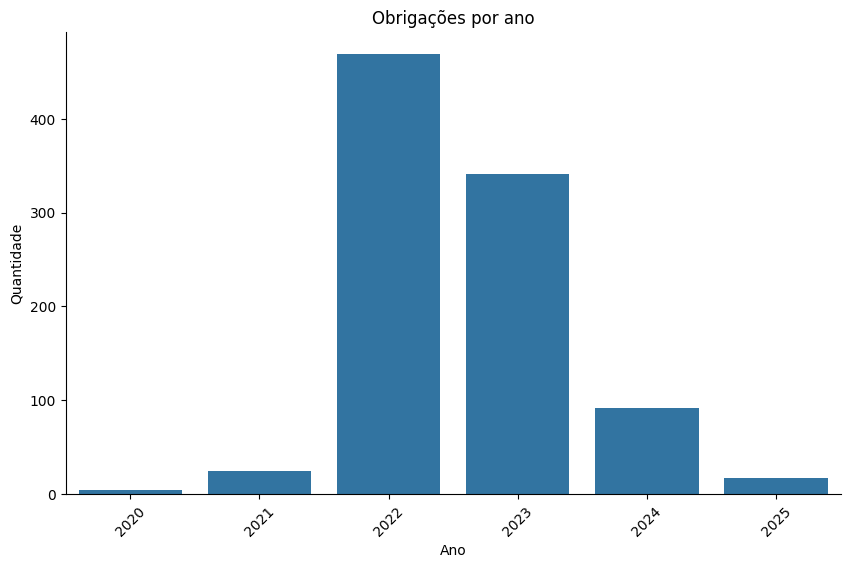

In [ ]:
import locale

plt.figure(figsize=(10, 6))
sns.barplot(x=df_obg['ano'].value_counts().index, y=df_obg['ano'].value_counts().values)
plt.title('Obrigações por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
sns.despine()
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", x, grouping=True)))
plt.show()

In [ ]:
df_obg.head()

,IdObrigacao,TipoObrigacao,TextoObrigacao,IdStatusObrigacao,PrazoInicioDeterminacao,PrazoFimDeterminacao,IdProcessoOriginario,IdComposicaoPautaFinalizacao,ClassificacaoObrigacao,IdMonitoramento,...,DataInclusao,IdSessao,IdComposicaoPauta,IdObrigacaoRenovada,PossuiPrazo,IdInformacao,ano,mes,ano_mes,TextoObrigacao_cleaned
0,1,Recomendacao,"ACORDAM os Conselheiros, nos termos do voto pr...",1,None,None,539600,None,Provisorio,None,...,2020-12-03 13:02:49.267,8894988,94836,None,False,1840062.0,2020,12,2020-12,"ACORDAM os Conselheiros, nos termos do voto pr..."
1,2,Recomendacao,"ACORDAM os Conselheiros, nos termos do voto pr...",1,None,None,539600,None,Provisorio,None,...,2020-12-03 13:05:24.397,8894988,94836,None,False,1840062.0,2020,12,2020-12,"ACORDAM os Conselheiros, nos termos do voto pr..."
2,3,Recomendacao,"ACORDAM os Conselheiros, nos termos do voto pr...",1,None,None,325697,None,Definitivo,None,...,2020-12-03 14:11:11.943,8894988,79258,None,False,1840063.0,2020,12,2020-12,"ACORDAM os Conselheiros, nos termos do voto pr..."
3,4,Recomendacao,"ACORDAM os Conselheiros, nos termos do voto pr...",1,None,None,539600,None,Provisorio,None,...,2020-12-03 14:15:38.083,8894988,94836,None,False,1840062.0,2020,12,2020-12,"ACORDAM os Conselheiros, nos termos do voto pr..."
4,5,Recomendacao,a) pelo DEFERIMENTO DA MEDIDA CAUTELAR para qu...,1,None,None,533281,None,Definitivo,None,...,2021-01-08 13:16:22.490,8906686,94786,None,False,1864068.0,2021,1,2021-01,a) DEFERIMENTO MEDIDA CAUTELAR para a Prefeita...


In [ ]:
print(df_obg.iloc[0].TextoObrigacao)

ACORDAM os Conselheiros, nos termos do voto proferido
pela Conselheira Relatora, julgar pela homologação do Termo de Ajustamento de Gestão nº
003/2020-pg celebrado entre o Ministério Público de Contas e o Governo do Estado do Rio
Grande do Norte, por meio da Controladoria-Geral do Estado, Secretaria de Estado do
Planejamento e das Finanças e Procuradoria-Geral do Estado, conforme as cláusulas
encartadas na referida avença, devendo a Secretaria das Sessões proceder com a publicação
integral do referido termo.
Em virtude da referida homologação, pelo SOBRESTAMENTO dos autos pelo período do
cumprimento integral do TAG ora homologado, restando ainda SUSPENSO o prazo
prescricional (art. 113 da LCE nº 464/12 c/c art. 330, inciso III, do RITCERN).
Após a publicação do Acórdão e Termo de Ajustamento de Gestão por parte da Secretaria das
Sessões, os autos deverão seguir ao Ministério Público de Contas para sobrestamento do
feito e monitoramento do TAG.


In [ ]:
df_obg.TipoObrigacao.value_counts()

TipoObrigacao
Recomendacao    861
Determinacao     87
Name: count, dtype: int64

In [ ]:
len(df_obg.CodOrgaoObrigacao.unique())

155

## Multas

In [ ]:
sql_multas = """ 
SELECT * 
    FROM processo.dbo.Exe_Debito
"""

df_multas = pd.read_sql(sql_multas, conn_processo)

/tmp/ipykernel_183691/1331304471.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_multas = pd.read_sql(sql_multas, conn_processo)


In [ ]:
len(df_multas)

26574

In [ ]:
df_multas['ano'] = df_multas.datainclusao.dt.year
df_multas['mes'] = df_multas.datainclusao.dt.month
df_multas['ano_mes'] = df_multas.datainclusao.dt.to_period('M')

In [ ]:
df_multas['ano_mes'].value_counts().mean()

np.float64(219.6198347107438)

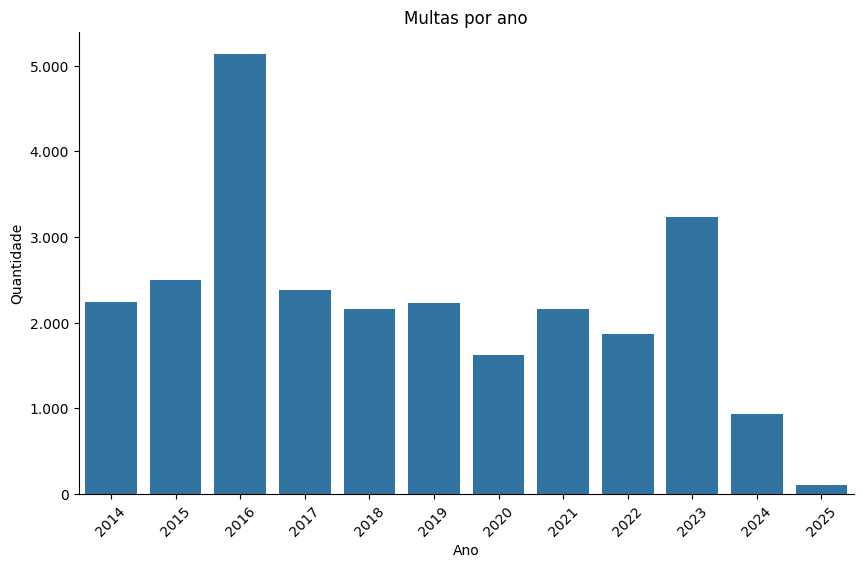

In [ ]:
import locale

plt.figure(figsize=(10, 6))
sns.barplot(x=df_multas['ano'].value_counts().index, y=df_multas['ano'].value_counts().values)
plt.title('Multas por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
sns.despine()
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", x, grouping=True)))
plt.show()

In [ ]:
df_multas.TipodeBaixa.unique()

array([None, False, True], dtype=object)

In [ ]:
df_multas.datainclusao

np.float64(1994.0)

# Processos Desconto em Folha

In [12]:
processos_ccd.marcador.fillna('', inplace=True)

In [13]:
processos_desconto = processos_ccd[processos_ccd.marcador.str.contains('DESCONTO')]

In [14]:
processos_desconto['marcador'].unique().astype(list)

array(['DESCONTO EM FOLHA - Nereu', 'DESCONTO EM FOLHA',
       'DESCONTO EM FOLHA - SUSPENSÃO POR DECISÃO JUDICIAL',
       'DESCONTO EM FOLHA ACOMPANHAMENTO GERAL',
       'DESCONTO EM FOLHA ACOMPANHAMENTO NEREU',
       'DESCONTO EM FOLHA - ATUALIZAR CADINQ'], dtype=object)

In [15]:
marcadores = ['DESCONTO EM FOLHA',
       'DESCONTO EM FOLHA ACOMPANHAMENTO GERAL',
       'DESCONTO EM FOLHA - SUSPENSÃO POR DECISÃO JUDICIAL',
       'DESCONTO EM FOLHA - ATUALIZAR CADINQ']

In [16]:
processos_desconto = processos_desconto[processos_desconto.marcador.isin(marcadores)]

In [17]:
sql_debitos = '''  
SELECT DISTINCT 
    ed.IdDebito AS id_debito,
    pro.numero_processo,
    pro.ano_processo,
    pro.assunto,
    etd.Descricao AS tipo_multa,
    edmc.DataFinalImputacaoMultaCominatoria AS data_final_cominatoria,
    pm.Descricao AS descricao,
    gp.Nome AS nome,
    gp.Documento AS cpf,
    orgao.nome_orgao AS orgao_servidor,
    processo.dbo.fn_Exe_RetornaValorAtualizado(ed.IdDebito) AS valor_multa,
    r.nome AS relator,
    ed.IdProcessoOrigem AS id_processo_origem,
    origem.numero_ano_processo AS processo_origem,
    ed.IdProcessoExecucao AS id_processo_execucao,
    execucao.numero_ano_processo AS processo_execucao

FROM processo.dbo.Processos pro
INNER JOIN processo.dbo.Pro_MarcadorProcesso pmp ON pmp.IdProcesso = pro.IdProcesso
INNER JOIN processo.dbo.Pro_Marcador pm ON pmp.IdMarcador = pm.IdMarcador
INNER JOIN processo.dbo.Relator r ON r.codigo = pro.codigo_relator 
LEFT JOIN processo.dbo.Exe_Debito ed ON ed.IdProcessoExecucao = pro.IdProcesso
LEFT JOIN processo.dbo.Exe_DebitoPessoa edp ON edp.IDDebito = ed.IdDebito
LEFT JOIN processo.dbo.Exe_TipoDebito etd ON etd.CodigoTipoDebito = ed.CodigoTipoDebito
LEFT JOIN processo.dbo.GenPessoa gp ON gp.IdPessoa = edp.IDPessoa
LEFT JOIN processo.dbo.Exe_Debito_MultaCominatoria edmc ON ed.IdDebito = edmc.IdDebito

-- Aplica orgão do servidor
OUTER APPLY (
    SELECT TOP 1 vspfr.nome_orgao
    FROM BdDIP.dbo.vwSiaiPessoalFolhaResumida vspfr
    WHERE vspfr.cpf = gp.Documento COLLATE SQL_Latin1_General_CP1_CI_AS
    ORDER BY vspfr.ano DESC, vspfr.mes DESC
) orgao

-- Aplica processo origem formatado
OUTER APPLY (
    SELECT CONCAT(numero_processo, '/', ano_processo) AS numero_ano_processo
    FROM processo.dbo.Processos
    WHERE IdProcesso = ed.IdProcessoOrigem
) origem

-- Aplica processo execução formatado
OUTER APPLY (
    SELECT CONCAT(numero_processo, '/', ano_processo) AS numero_ano_processo
    FROM processo.dbo.Processos
    WHERE IdProcesso = ed.IdProcessoExecucao
) execucao

WHERE pro.setor_atual = 'CCD'
  AND pm.Descricao IN (
      'DESCONTO EM FOLHA',
      'DESCONTO EM FOLHA ACOMPANHAMENTO GERAL',
      'DESCONTO EM FOLHA - SUSPENSÃO POR DECISÃO JUDICIAL',
      'DESCONTO EM FOLHA - ATUALIZAR CADINQ'
  )
  AND ed.CodigoStatusDivida = 1;

'''

debitos_desconto = pd.read_sql(sql_debitos, conn)

/tmp/ipykernel_123416/3626970600.py:63: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  debitos_desconto = pd.read_sql(sql_debitos, conn)


In [19]:
debitos_desconto.to_excel('saidas/descontos_folha_ccd.xlsx', index=False)